In [1]:
import matplotlib.pyplot as plt
import numpy as np
def tri_3pl_enem(theta, a, b, c):
    return c+(1-c)*(1/(1+np.exp(-1.7*a*(theta-b))))

In [2]:
def plot_graphic(a, b, c):
    theta_vals = np.linspace(-4, 4, num=100)
    y_vals = [tri_3pl_enem(x, a, b, c) for x in theta_vals]
    plt.plot(theta_vals, y_vals)
    plt.xlabel('Valores de theta')
    plt.ylabel('Probabilidade de resposta correta')
    plt.title('Modelo logístico de três parâmetros (TRI)')
    plt.axhline(y=0.65, xmin=-4)
    plt.show()

In [4]:
def find_theta(a, b, c):
    left = -100
    right = 100
    tol = 1e-5
    target = 0.65
    while (right-left)/2 > tol:
        theta = (left + right) / 2
        value = tri_3pl_enem(theta, a, b, c)
        if value > target:
            right = theta
        else:
            left = theta
    return theta*100+500

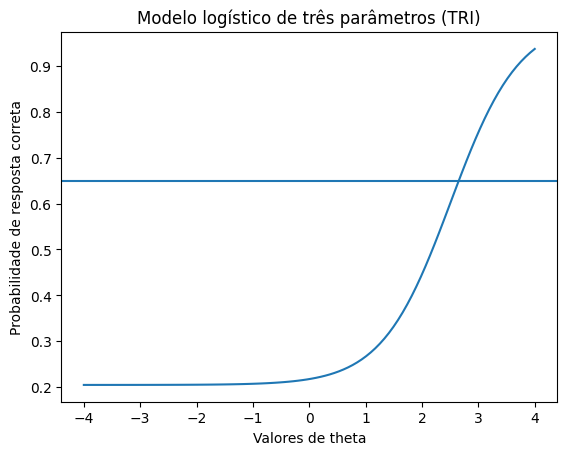

765.2871608734131

In [5]:
plot_graphic(0.96583, 2.50648, 0.2049)
find_theta(0.96583, 2.50648, 0.2049)

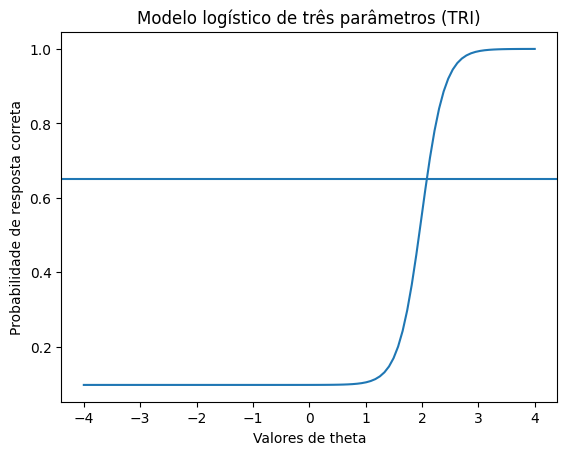

708.4839344024658

In [6]:
plot_graphic(2.898, 1.992, 0.097)
find_theta(2.898, 1.992, 0.097)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def tri_3pl_enem(theta, a, b, c):
    return c+(1-c)*(1/(1+np.exp(-1.7*a*(theta-b))))

In [3]:
def plot_graphic(a, b, c):
    theta_vals = np.linspace(-4, 4, num=100)
    y_vals = [tri_3pl_enem(x, a, b, c) for x in theta_vals]
    plt.plot(theta_vals, y_vals)
    plt.xlabel('Valores de theta')
    plt.ylabel('Probabilidade de resposta correta')
    plt.title('Modelo logístico de três parâmetros (TRI)')
    plt.axhline(y=0.65, xmin=-4)
    plt.show()

In [4]:
def find_theta(a, b, c):
    left = -100
    right = 100
    tol = 1e-5
    target = 0.65
    while (right-left)/2 > tol:
        theta = (left + right) / 2
        value = tri_3pl_enem(theta, a, b, c)
        if value > target:
            right = theta
        else:
            left = theta
    return theta*100+500

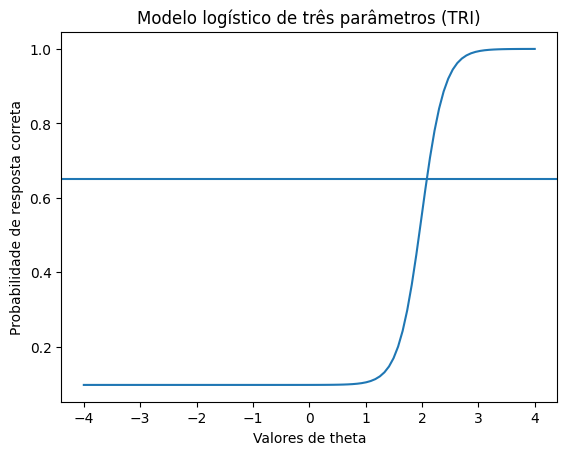

708.4839344024658

In [5]:
plot_graphic(2.898, 1.992, 0.097)
find_theta(2.898, 1.992, 0.097)